# LP1 Assign Part A Kmeans Clustering

### Disha Chavan             33212

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read csv file

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Shape of data set

In [4]:
df.shape

(200, 5)

### Information about data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Check for null values

In [7]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Set index column

In [8]:
df = df.set_index('CustomerID')
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### Convert object column to numerical type

In [9]:
from sklearn import preprocessing

In [10]:
label_encoder = preprocessing.LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

In [11]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


### Data preparation

In [12]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.iloc[:,:4]
Y = df.index
Y

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
           dtype='int64', name='CustomerID', length=200)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.75, random_state=123)
y_train.shape

(150,)

### Kmeans clustering

In [15]:
from sklearn.cluster import KMeans

In [16]:
cluster = []
for k in range(1,11):
    kmean = KMeans(n_clusters=k).fit(df)
    cluster.append(kmean.inertia_)
    


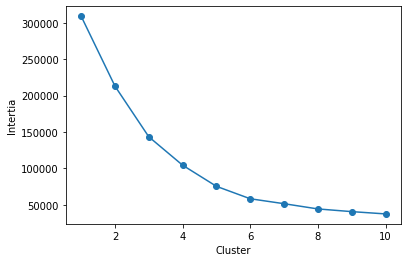

In [17]:
plt.plot(range(1,11), cluster, marker="o" )
plt.xlabel('Cluster')
plt.ylabel('Intertia')
plt.show()

In [18]:
km = KMeans(n_clusters=5).fit(df)
df['Labels'] = km.labels_
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Labels
CustomerID,,,,,
1,1,19,15,39,3
2,1,21,15,81,4
3,0,20,16,6,3
4,0,23,16,77,4
5,0,31,17,40,3
...,...,...,...,...,...
196,0,35,120,79,0
197,0,45,126,28,2
198,1,32,126,74,0


In [19]:
centers = np.array(km.cluster_centers_)

### Plotting clusters

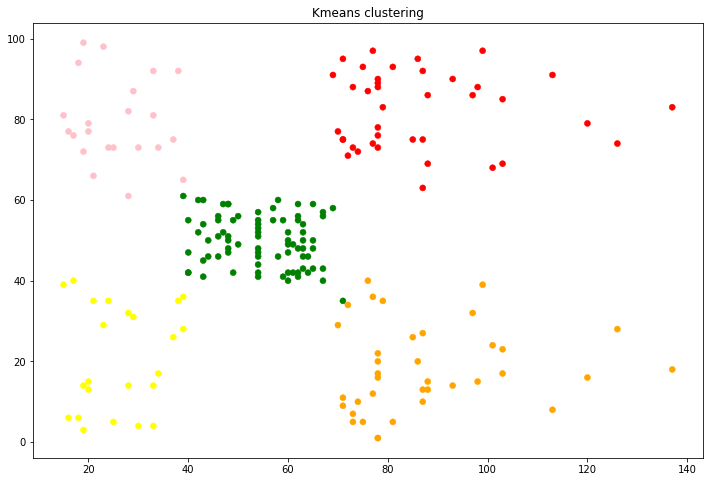

In [22]:
colors = {0:'red', 1:'green', 2:'orange',3:'yellow',4:'pink'}
plt.figure(figsize=(12, 8))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], linewidths=0.5,color=df['Labels'].map(colors))
plt.title('Kmeans clustering')
plt.show()

### Plotting centroids of the clusters

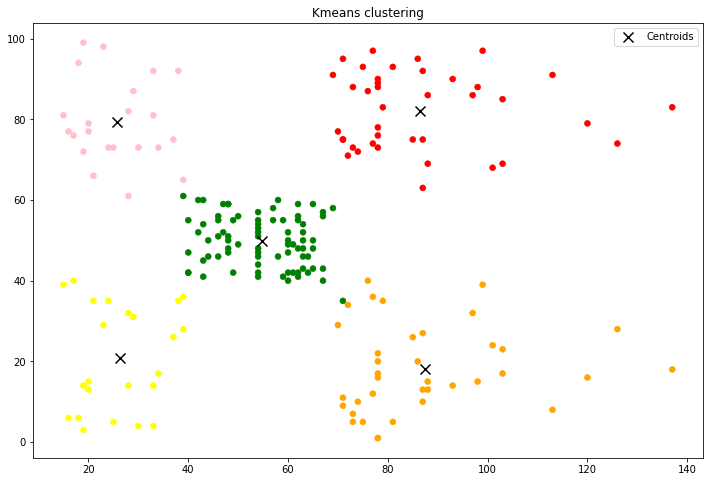

In [21]:
colors = {0:'red', 1:'green', 2:'orange',3:'yellow',4:'pink'}
plt.figure(figsize=(12, 8))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], linewidths=0.5,color=df['Labels'].map(colors))
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 3], s = 100, c = 'black', label = 'Centroids', marker='x')
plt.title('Kmeans clustering')
plt.legend()
plt.show()